Supervised machine learning involves training a model using a dataset that contains known label values to predict new labels based on a set of features. During the training process, the model learns to map the features to the known labels to create a general function that can predict the labels of new data points.

This function can be represented as y=f(x), where x is a vector of feature values and y is the label to be predicted.

The ultimate objective of training the model is to find a function that accurately calculates the labels from the given features.

This is achieved by applying a machine learning algorithm that adjusts the function to fit the feature values with the known labels from the training dataset.

This tutorial focuses on regression, where we will use a real-time case study on a bike-sharing scheme to predict the number of bike shares based on weather conditions and seasonality.

Bike-sharing systems are a convenient way of renting bicycles, where the rental process is automated through a network of kiosks located throughout a city.

This allows people to rent a bike from one location and return it to another place as needed. With over 500 bike-sharing programs available worldwide, the data generated by these systems has become a valuable resource for researchers.

The bike-sharing system data includes information on the duration of travel, departure and arrival locations, and time elapsed, which makes it an attractive resource for studying mobility patterns within a city. Essentially, the bike-sharing systems act as a sensor network that can be utilized for research purposes.

In [40]:
from google.colab import drive

In [41]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# load the training dataset
bike_dt = pd.read_csv('/content/london_merged.csv')
bike_dt.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


The dataset has the following columns:

    timestamp: Representing timestamp of bike share
    cnt: Representing total number of bike shares
    t1: The temperature in celsius.
    t2: The apparent (“feels-like”) temperature in celsius.
    hum: The humidity level
    wind_speed: The windspeed
    weather_code: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
    is_holiday: A binary value indicating whether or not the day is a holiday
    is_weekend: A binary value indicating whether or not the day is a weekend
    season: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)

In this dataset, cnt represents the dependent variable i.e., label (the y value) our model must be trained to predict. The other columns are potential features (x values).

let’s look into the number of records in the dataset and the datatype of each column. For this, we will use info() function in the pandas data frame.


In [42]:
bike_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


It is evident that there are no missing values in the dataset and the columns have a correct mapping with the datatype. A total of 17413 records are present in the dataset in which 8 columns have float datatype, 1 has int datatype and 1 has object datatype.

In [43]:
bike_dt.shape

(17414, 10)

In [44]:
bike_dt.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season'], dtype='object')

In [45]:
bike_dt.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [46]:
bike_dt.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


# Null values check

In [47]:
bike_dt.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

# Duplicated rows check

In [48]:
bike_dt.duplicated().value_counts()

# bike_dt.duplicated().sum()

False    17414
dtype: int64

In [49]:
# See The Duplicated Value
bike_dt.loc[bike_dt.duplicated()]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season


In [50]:
#Count the Weather Unique Values
bike_dt.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [51]:
# Count The Season Unique Values
bike_dt.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

# Chancing datatypes
Categorical variables such as "season", "haliday", "weekend" and "weathercode" have float64 data type.
Before starting the analyses, we want to transform them into categorical (object) variables.


In [52]:
## Season
bike_dt['season'].replace(0, 'Spring', inplace=True)
bike_dt['season'].replace(1, 'Summer', inplace=True)
bike_dt['season'].replace(2, 'Fall', inplace=True)
bike_dt['season'].replace(3, 'Winter', inplace=True)

#--------------------------------------------------

#Is Holiday
#bike_dt['is_holiday'].replace(1, 'Holiday', inplace=True)
#bike_dt['is_holiday'].replace(0, 'Non-holiday', inplace=True)

#--------------------------------------------------------

# Is weekend
#bike_dt['is_weekend'].replace(1, 'Weekend', inplace=True)
#bike_dt['is_weekend'].replace(0, 'Non-weekend', inplace=True)

#------------------------------------------------------------

#Weather Codes
bike_dt['weather_code'].replace(1, 'Clear', inplace=True)
bike_dt['weather_code'].replace(2, 'scattered clouds', inplace=True)
bike_dt['weather_code'].replace(3, 'Broken clouds', inplace=True)
bike_dt['weather_code'].replace(4, 'Cloudy', inplace=True)
bike_dt['weather_code'].replace(7, 'Rain', inplace=True)
bike_dt['weather_code'].replace(10, 'rain with thunderstorm', inplace=True)
bike_dt['weather_code'].replace(26, 'snowfall', inplace=True)
bike_dt['weather_code'].replace(94, 'Freezing Fog', inplace=True)
bike_dt.head(3)


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,Winter


In [53]:
bike_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  object 
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


In [73]:
monthly_bike_share  = (bike_dt.groupby('day')['cnt'].sum()/1000000).round(1)
monthly_bike_share

day
1     0.6
2     0.6
3     0.6
4     0.7
5     0.7
6     0.7
7     0.7
8     0.7
9     0.7
10    0.7
11    0.7
12    0.7
13    0.6
14    0.6
15    0.7
16    0.7
17    0.7
18    0.7
19    0.7
20    0.6
21    0.6
22    0.6
23    0.7
24    0.6
25    0.7
26    0.6
27    0.6
28    0.6
29    0.6
30    0.6
31    0.3
Name: cnt, dtype: float64

# Feature Engineering

The feature engineering process involves identifying the relevant features from the available dataset and then creating new features that can improve the model’s predictive power.

This could include combining features, transforming variables, or selecting only the most important features for the model. By engineering the features, the model can make more accurate predictions, resulting in better performance and more valuable insights.

In this dataset, we will perform some feature engineering to combine or derive new features. For example, adding new columns such as day, month, and hour to the data frame by extracting the day component from the existing timestamp column.


In [55]:
# as the datatype of timestamp is object we need to convert it into datetime
bike_dt["timestamp"] = pd.to_datetime(bike_dt["timestamp"])
# deriving month feature
bike_dt["month"] = bike_dt["timestamp"].apply(lambda x:x.month)
# deriving day feature
bike_dt["day"] = bike_dt["timestamp"].apply(lambda x:x.day)
# deriving hour feature
bike_dt["hour"] = bike_dt["timestamp"].apply(lambda x:x.hour)
# removing timestamp feature as there is no use now
bike_dt = bike_dt.drop("timestamp", axis=1)
# checking dataframe
bike_dt.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,Winter,1,4,0
1,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,Winter,1,4,1
2,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,Winter,1,4,2
3,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,Winter,1,4,3
4,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,Winter,1,4,4


As weather_code and season are categorical variables so we need to handle them by transforming into numerical values using One Hot Encoding.

In [56]:
# One-hot encoding
## 1. encoding weather_code
dummies_w = pd.get_dummies(bike_dt["weather_code"], prefix="weather")
bike_dt = pd.concat([bike_dt,dummies_w], axis=1)
bike_dt = bike_dt.drop("weather_code", axis=1)

## 2. encoding season
dummies_s = pd.get_dummies(bike_dt["season"], prefix="season")
bike_dt = pd.concat([bike_dt,dummies_s], axis=1)
bike_dt = bike_dt.drop("season", axis=1)

let’s start to deep dive into analyzing data by examining a few key descriptive statistics. We can use the dataframe’s describe method to generate these for the numeric features as well as the cnt label column.

In [57]:
numeric_features = ['t1', 't2', 'hum', 'wind_speed','day','hour','month']
bike_dt[numeric_features + ['cnt']].describe().T

,count,mean,std,min,25%,50%,75%,max
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
day,17414.0,15.751981,8.793704,1.0,8.0,16.0,23.00,31.0
hour,17414.0,11.513265,6.915893,0.0,6.0,12.0,18.00,23.0
month,17414.0,6.514643,3.452509,1.0,4.0,7.0,10.00,12.0
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0


The above statistics provide information about the distribution of the data in the numeric fields, including the number of observations (731 records), mean, standard deviation, minimum and maximum values, and quartile values (25%, 50% – which is the median, and 75% of the data).

Based on these statistics, the mean number of daily bike share counts is approximately 1143, with a slight variance in the number of bike shares per day, as indicated by the difference in standard deviation.

To gain a clearer understanding of the distribution of bike share values, we can visualize the data using histograms and box plots. For this purpose, we will use Python’s matplotlib library to create these plots for the “cnt” column.

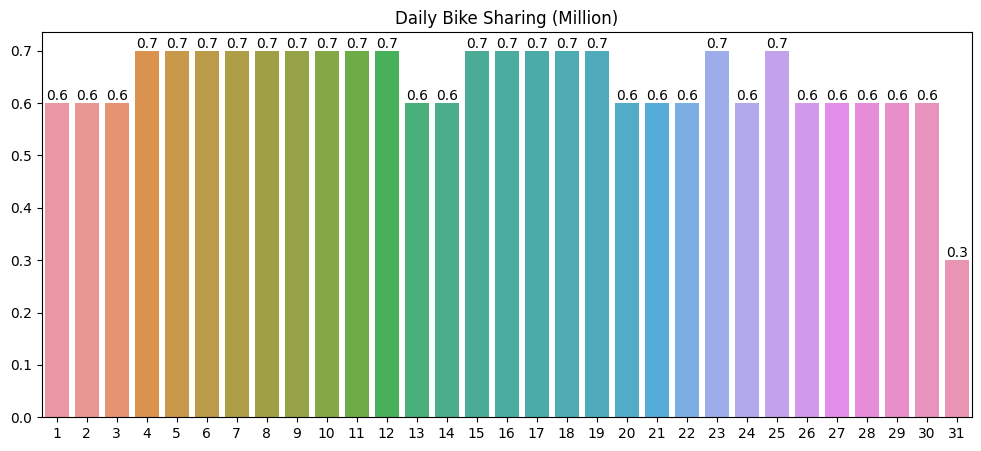

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values, errorbar=None)
ax.set_title("Daily Bike Sharing (Million)")
ax.set_xlabel('') # To cancel writing "day" on the x-axis

for i in ax.containers:
    ax.bar_label(i)


Exploratory Data Analysis (EDA)

Next, we will do a basic exploration of the dataset to understand the underlying pattern within the dataset.


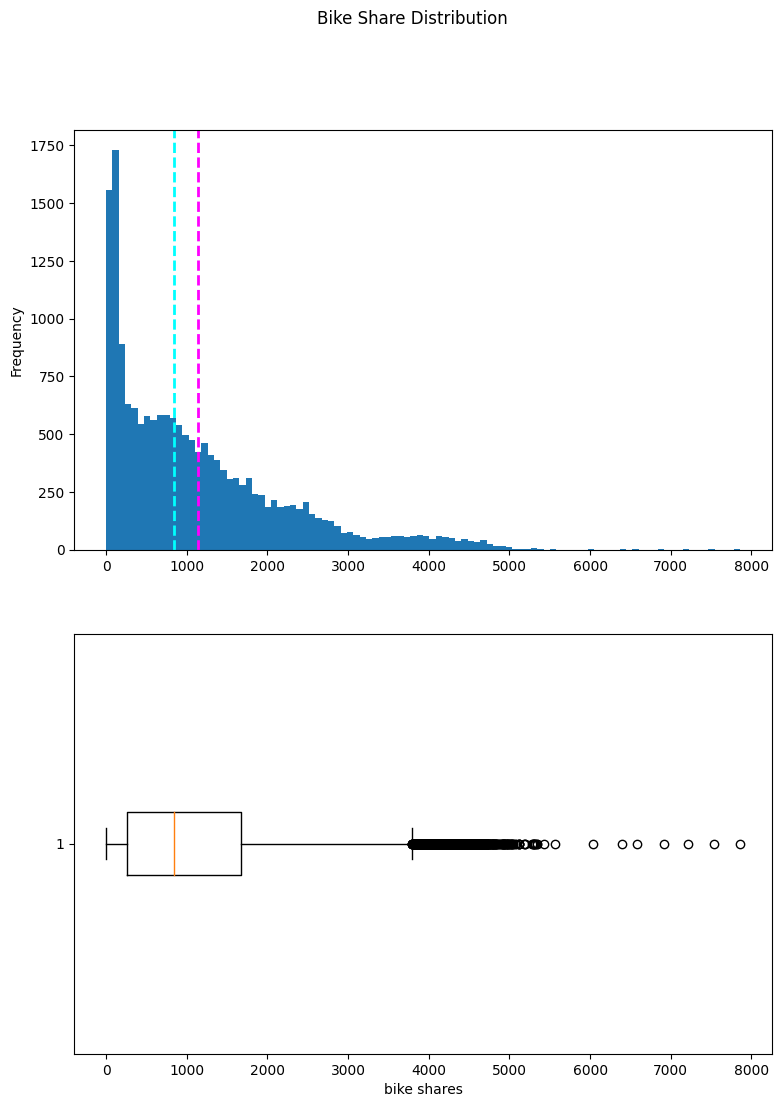

In [59]:
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_dt['cnt']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('bike shares')

# Add a title to the Figure
fig.suptitle('Bike Share Distribution')

# Show the figure
fig.show()

The plotted data displays the range of daily bike rentals, which spans from 0 to slightly over 5000. However, the mean (and median) number of daily rentals is closer to the lower end of this range, with the majority of the data being between 0 and approximately 1800 bike shares. The box plot depicts the few values above this range as small circles, indicating that they are outliers – that is, they are unusual values that fall outside the typical range of most of the data.

We can apply the same method of visual exploration to the other numeric features by creating histograms for each of them.

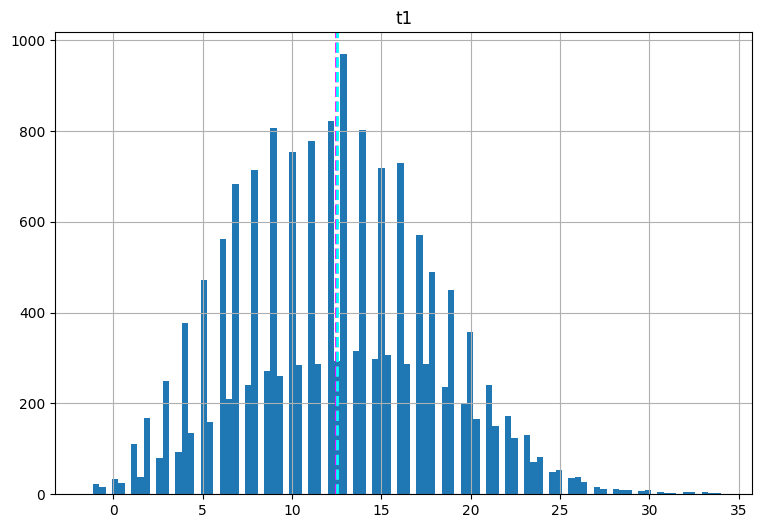

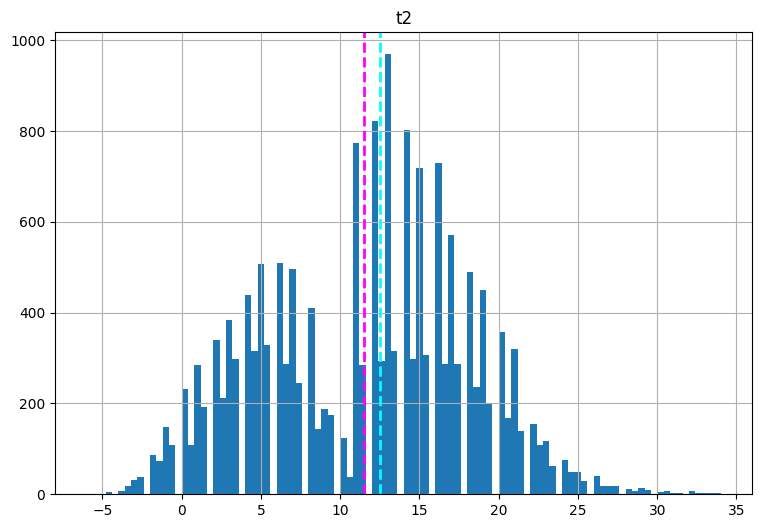

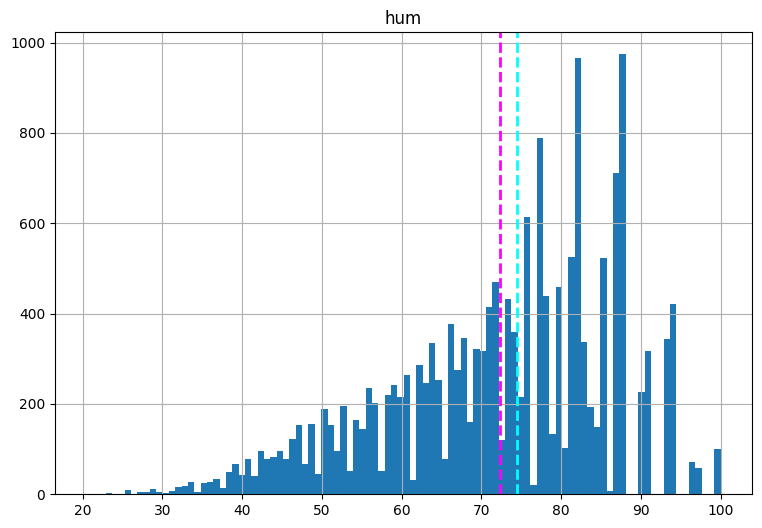

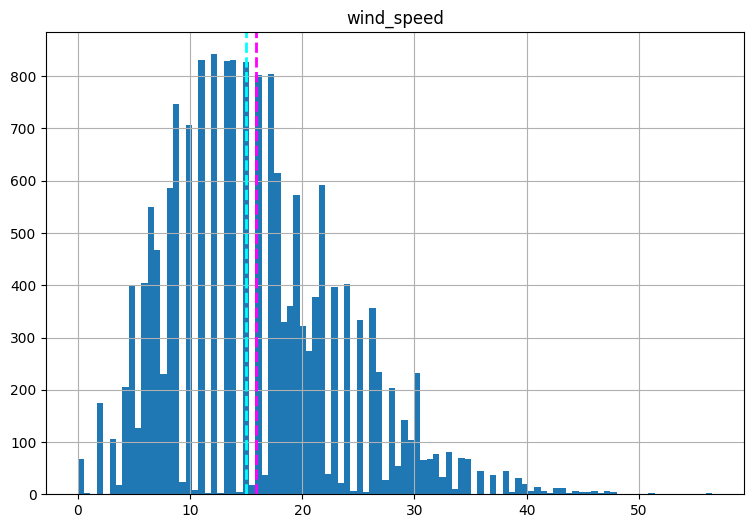

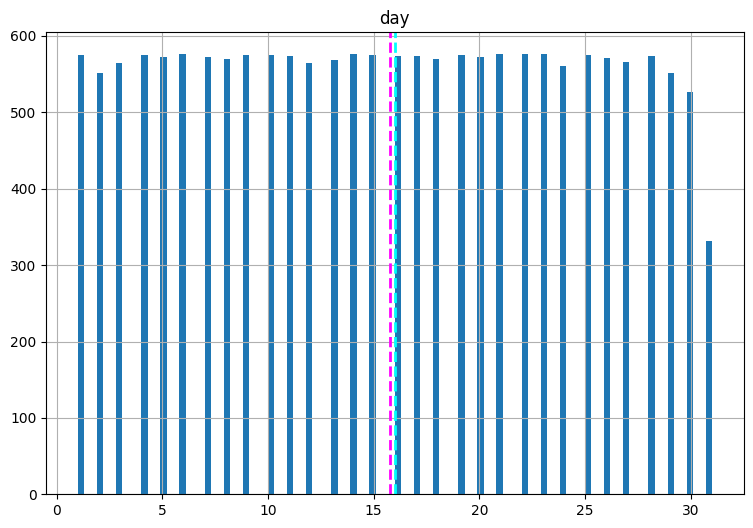

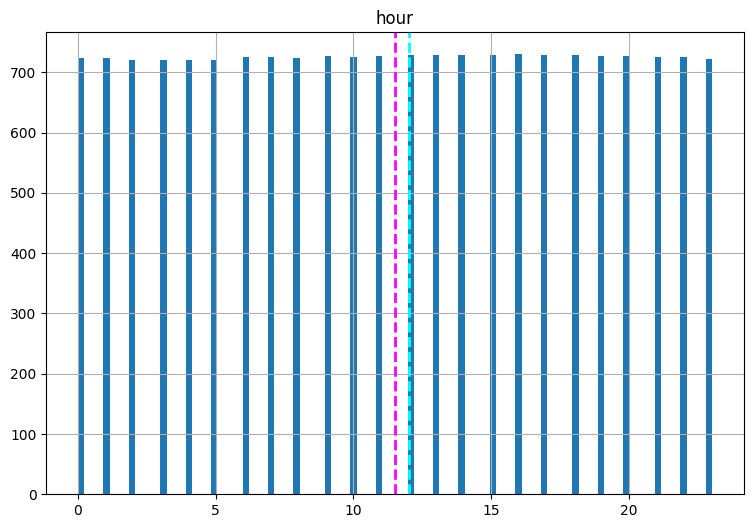

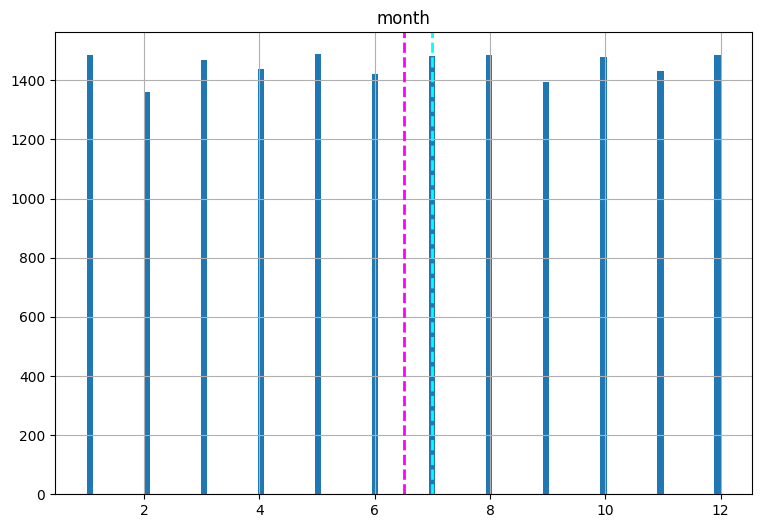

In [61]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_dt[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

The numeric features displayed above appear to have a more normal distribution, with the mean and median located towards the middle of the range of values. However, in the case of humidity, the mean and median are towards the right side, coinciding with where the most commonly occurring values are.

Please note that the distributions are not truly normal in the statistical sense, which would result in a smooth, symmetrical “bell-curve” histogram with the mean and mode (the most common value) in the center. Nevertheless, they do suggest that most of the observations have a value somewhere near the middle.

In addition to creating histograms, we can also generate scatter plots that illustrate the intersection of feature and label values for the numeric features. Furthermore, we can calculate the correlation statistic to measure the apparent relationship between them.


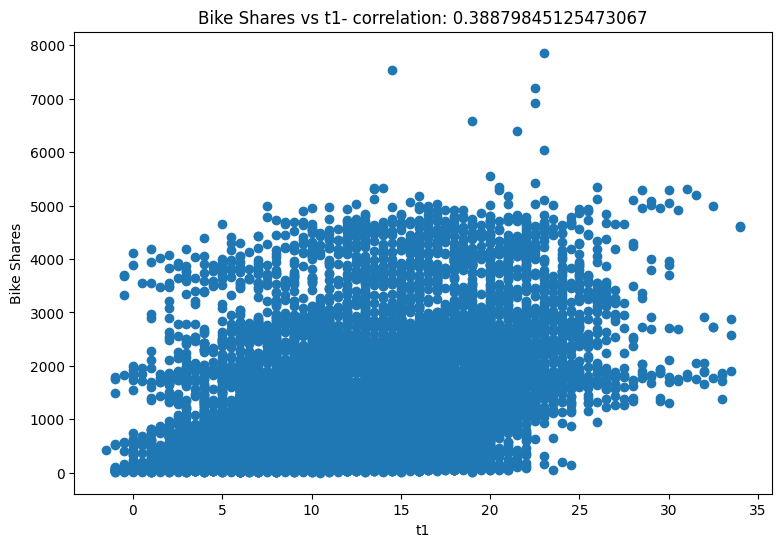

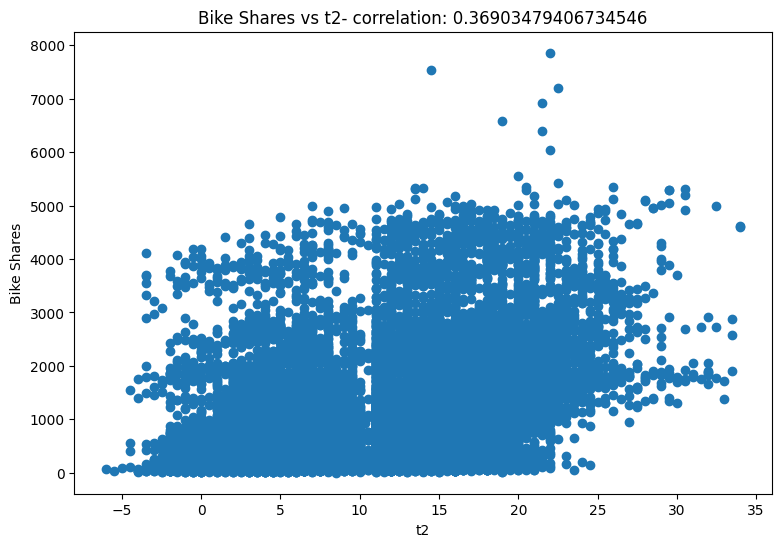

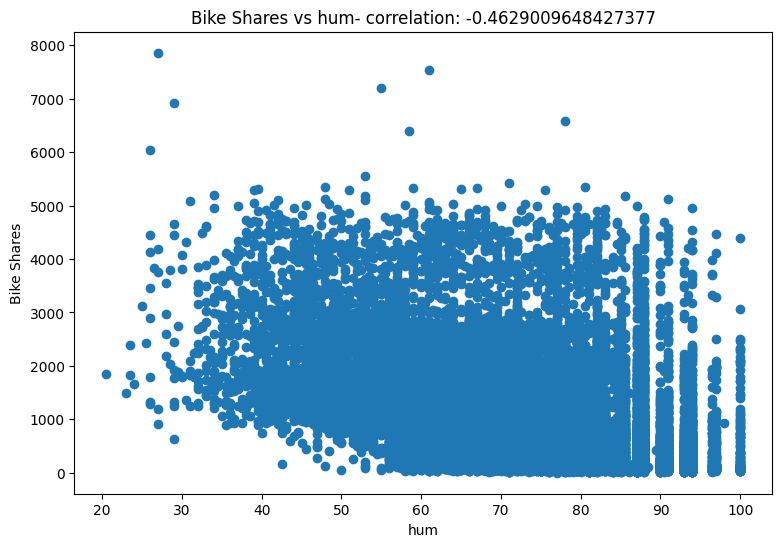

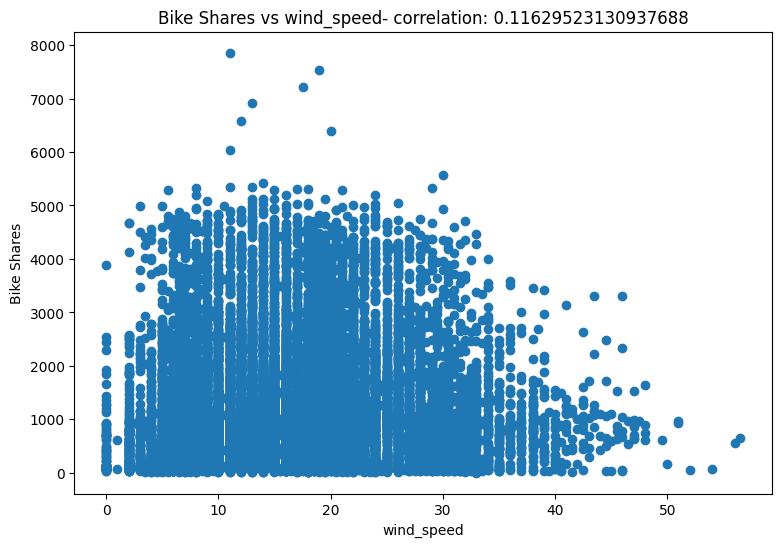

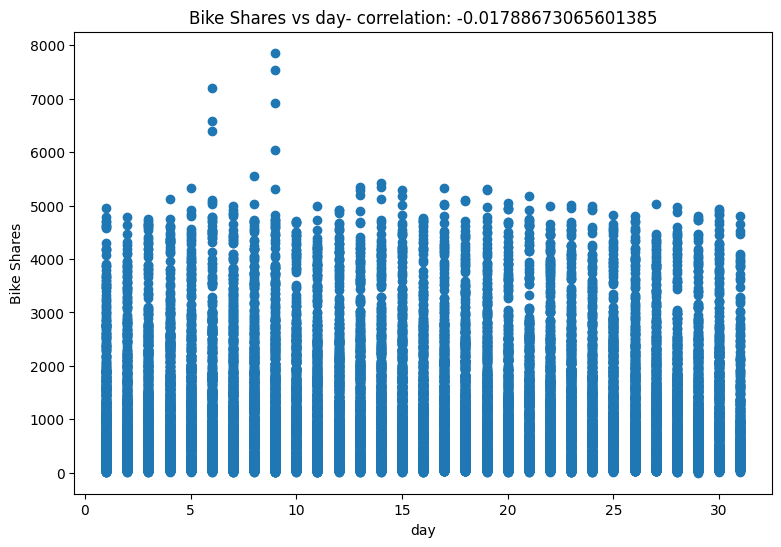

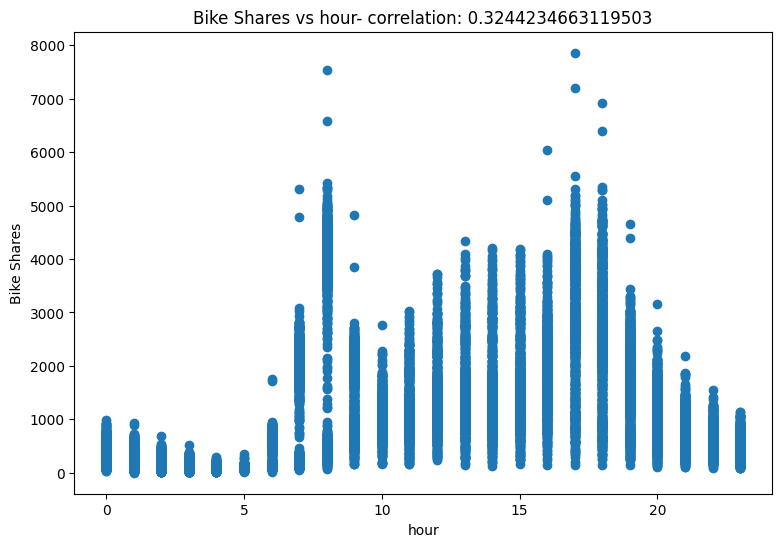

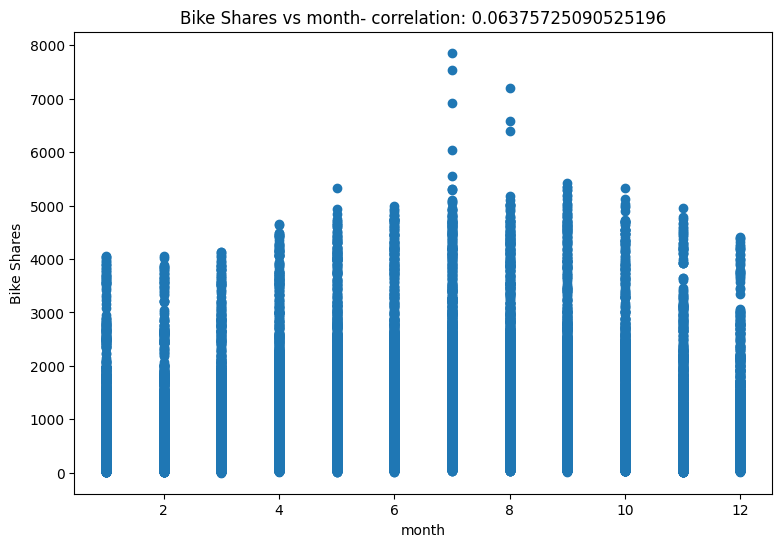

In [60]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_dt[col]
    label = bike_dt['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Shares')
    ax.set_title('Bike Shares vs ' + col + '- correlation: ' + str(correlation))
plt.show()

Although not conclusive, upon closer examination of the scatter plots for t1 and t2, we can discern a faint diagonal trend suggesting that higher bike share counts tend to coincide with higher temperatures. A correlation value of just over 0.5 for both of these features supports this observation. Conversely, the plots for hum and windspeed display a slightly negative correlation, indicating that there are fewer bike rentals on days with high humidity or windspeed.

Moving forward, we can compare the categorical features to the label by creating box plots that display the distribution of share counts for each category.

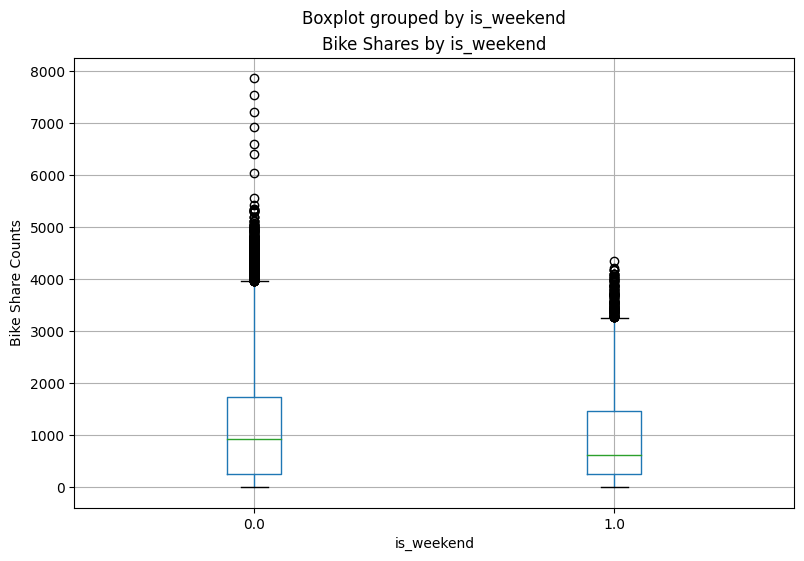

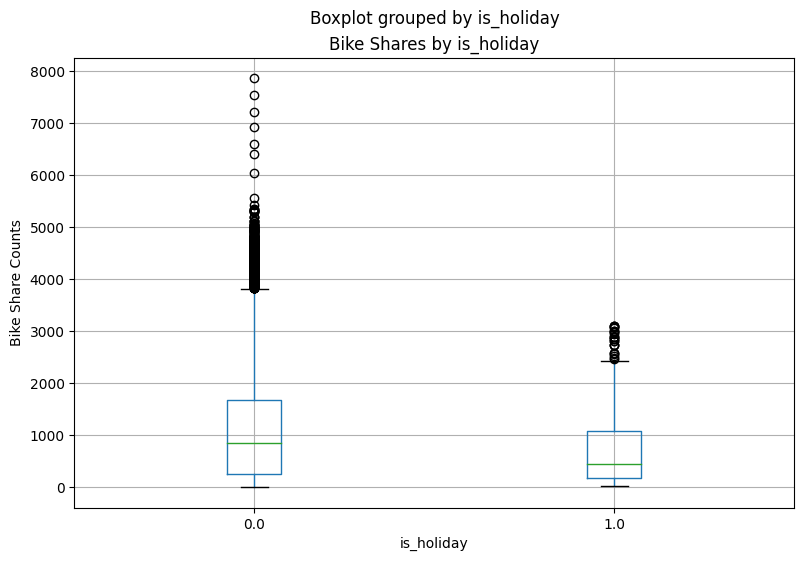

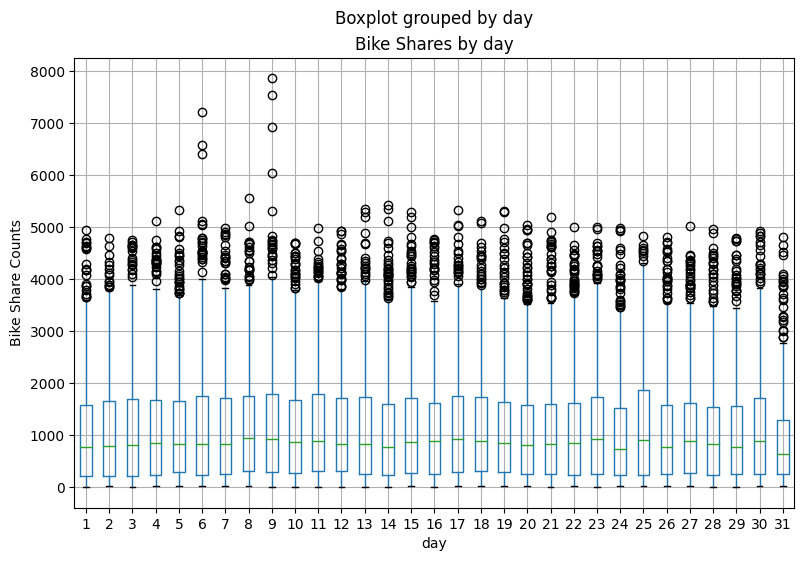

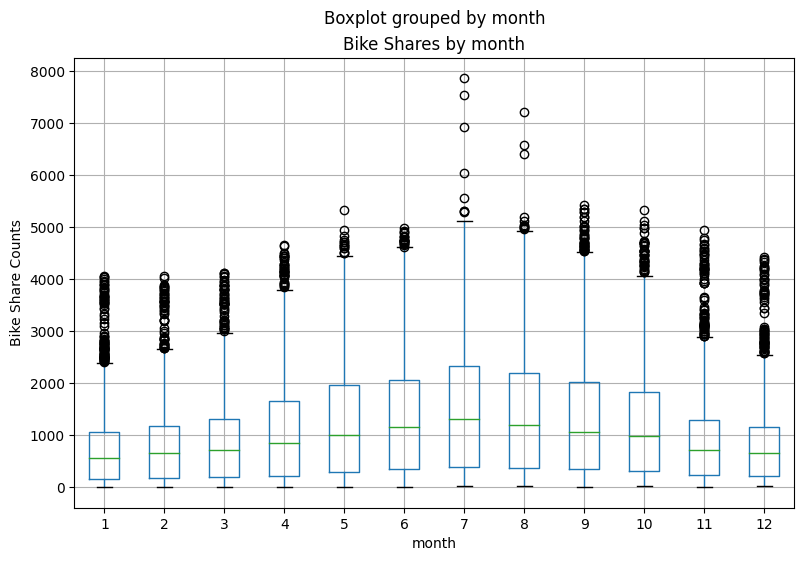

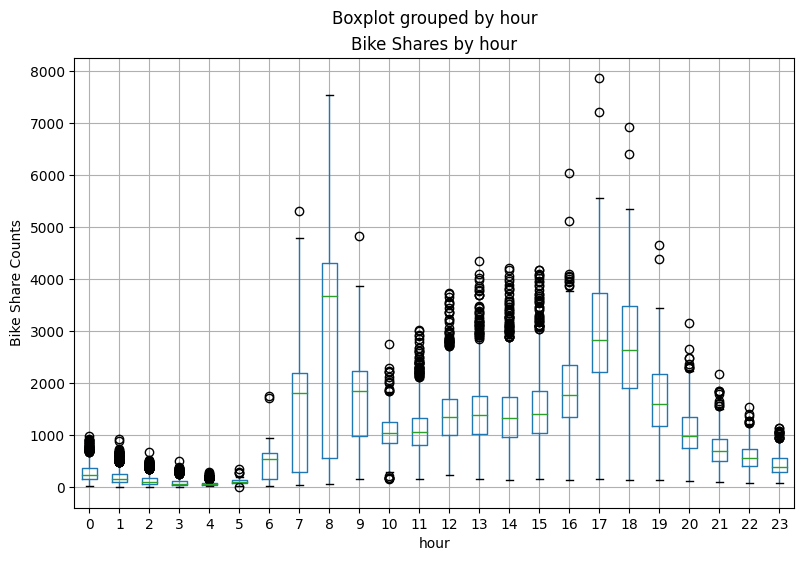

In [62]:
# plot a bar plot for each categorical feature count
categorical_features = ['is_weekend','is_holiday','day','month','hour']
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_dt.boxplot(column = 'cnt', by = col, ax = ax)
    ax.set_title('Bike Shares by ' + col)
    ax.set_ylabel("Bike Share Counts")
plt.show()

The plotted data reveals some variation in the relationship between certain category values and bike rentals. For instance, the distribution of bike shares is similar on weekends and holidays. Additionally, a clear trend indicates that there are different bike share distributions during daytime hours (10 AM to 3 PM) compared to evening and nighttime hours.

### Train a Regression Model

Now that we have examined the data, our next step is to use it to train a regression model that employs the potentially predictive features we have identified to forecast the “cnt” label. To begin, we must segregate the features we want to utilize for training the model from the label that we aim to predict.


In [63]:
# Segregating Features and Target variable as X and y respectively
X = bike_dt.drop("cnt", axis=1)
y = bike_dt["cnt"]

Upon segregating the dataset, we now possess two NumPy arrays: X, which comprises the features, and y, which comprises the labels.

Although we could train a model using all of the data, it’s customary in supervised learning to divide the data into two subsets: one (typically larger) subset to train the model and another smaller “hold-back” subset to validate the trained model. This approach allows us to assess the model’s performance by comparing the predicted labels to the known labels when it is used with the validation dataset. Randomly splitting the data is critical (as opposed to, say, taking the first 80% of the data for training and reserving the remainder for validation) to ensure that both subsets have a similar statistical distribution.

To split the data randomly, we will employ the train_test_split function found in the scikit-learn library. This library is among the most widely used machine learning packages for Python.


In [64]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 13931 rows
Test Set: 3483 rows


we have the following four datasets:

    X_train: The feature values we’ll use to train the model
    y_train: The corresponding labels we’ll use to train the model
    X_test: The feature values we’ll use to validate the model
    y_test: The corresponding labels we’ll use to validate the model

At this point, we can train a model by applying a regression algorithm that can fit the training data. We will employ a linear regression algorithm, which is a common starting point for regression. This algorithm works by attempting to determine a linear relationship between the “X” values and the “y” label. Ultimately, the resulting model will be a function that outlines a line that intersects every conceivable combination of “X” and “y” values.

## Feature Scaling

Scaling is a common technique utilized as part of the data preparation process for machine learning. The objective of scaling is to adjust the values of numeric columns in the dataset to a shared scale, without compromising the differences in the value ranges. We will employ the standard scaler for standardization.

Standardization is another scaling technique that centralizes the values around the mean with a unit standard deviation. This means that the attribute’s mean becomes zero, and the resulting distribution has a unit standard deviation.


In [65]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']] = scaler.fit_transform(X_train[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']])

X_test[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']] = scaler.transform(X_test[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']])

# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)

In [67]:
bike_dt.head()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,month,day,hour,weather_Broken clouds,weather_Clear,weather_Cloudy,weather_Rain,weather_rain with thunderstorm,weather_scattered clouds,weather_snowfall,season_Fall,season_Spring,season_Summer,season_Winter
0,182,3.0,2.0,93.0,6.0,0.0,1.0,1,4,0,1,0,0,0,0,0,0,0,0,0,1
1,138,3.0,2.5,93.0,5.0,0.0,1.0,1,4,1,0,1,0,0,0,0,0,0,0,0,1
2,134,2.5,2.5,96.5,0.0,0.0,1.0,1,4,2,0,1,0,0,0,0,0,0,0,0,1
3,72,2.0,2.0,100.0,0.0,0.0,1.0,1,4,3,0,1,0,0,0,0,0,0,0,0,1
4,47,2.0,0.0,93.0,6.5,0.0,1.0,1,4,4,0,1,0,0,0,0,0,0,0,0,1


# Evaluate Trained Model

Now that we have trained the model, we can use it to predict bike share counts for the features we retained in our validation dataset. We can then evaluate the model’s performance by comparing these predictions to the actual label values. This assessment will allow us to determine how effective the model is (or isn’t) in forecasting.

In [66]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1159. 1841.  963. 2256. 2022. 1827. 1146.  627. 1123. 1132.]
Actual labels   :  6597      705
3181      958
15495     497
13414    1392
7921     3073
2576     2190
12436     138
17381    1350
3479     1845
16493    1705
Name: cnt, dtype: int64


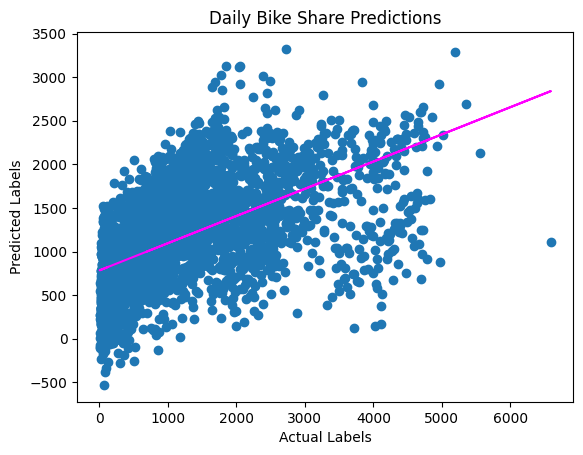

In [68]:
%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

There is an apparent diagonal trend, and the points where the predicted and actual values intersect generally follow the trend line. However, there is a noticeable difference between the ideal function represented by the line and the results.

This variation represents the model’s residuals, which are the differences between the predicted label and the actual value of the validation label when the model applies the coefficients it learned during training to the validation data.

By assessing these residuals from the validation data, we can estimate the level of error that can be expected when the model is used with new data for which the label is unknown.

We can calculate several commonly used evaluation metrics to quantify the residuals. The three metrics we will focus on are:

Mean Square Error (MSE): This represents the mean of the squared differences between predicted and actual values. It is a relative metric where a smaller value indicates a better model fit.

Root Mean Square Error (RMSE): This represents the square root of the MSE. It is an absolute metric in the same unit as the label (in this case, number of rentals). A smaller value indicates a better model fit. In a simplistic sense, it represents the average number of rentals by which the predictions are incorrect.

Coefficient of Determination (usually referred to as R-squared or R2): This is a relative metric where a higher value represents a better model fit. This metric indicates how much of the variance between predicted and actual label values the model can explain.

The  Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data.


In [69]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 814512.2659879726
RMSE: 902.5033329511713
R2: 0.31944661704384913


So now we’ve quantified the ability of our model to predict the number of rentals. It definitely has some predictive power, but we can probably do better!


Let’s try training our regression model by using a Lasso algorithm. We can do this by just changing the estimator in the training code.


Lasso() 

MSE: 814938.4461883481
RMSE: 902.7394121164468
R2: 0.319090528634594


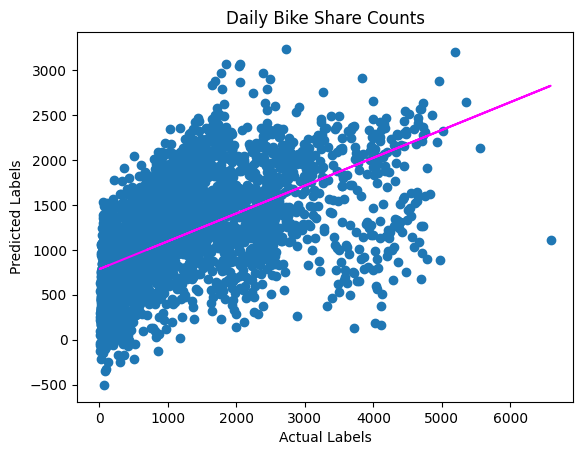

In [70]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Counts')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Decision Tree Algorithm

Instead of utilizing a linear model, there exists a group of algorithms for machine learning that adopt a tree-based methodology. In this approach, the features in the dataset are scrutinized through a series of evaluations, with each evaluation resulting in a branch in a decision tree based on the feature value. At the end of each branch, there are leaf nodes with the predicted label value derived from the feature values.


To better comprehend this process, let’s use the bike rental data to train a Decision Tree regression model. After training the model, the code will display the model definition and a text-based illustration of the tree that it uses to forecast label values.

MSE: 94959.75251220212
RMSE: 308.1554031851496
R2: 0.9206578175486773


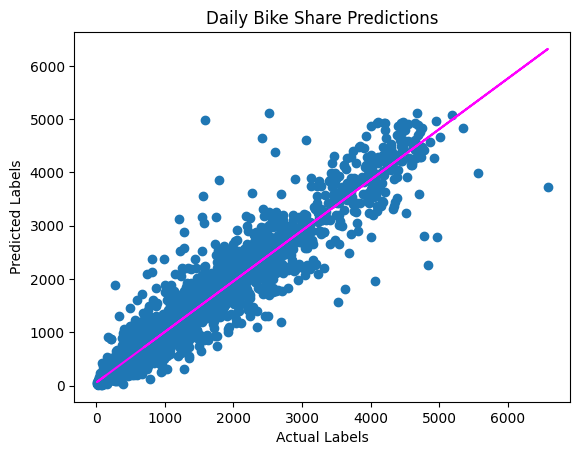

In [71]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

 we can observe from the above results, our R2 score shoots up to 0.92065 from 0.308 which signifies our model has higher predictive power and that is evident from the plot.

# Ensemble Algorithm

Ensemble algorithms operate by integrating multiple base estimators to generate an optimal model, either by employing an aggregate function to a group of base models (referred to as “bagging”) or by constructing a series of models that enhance one another to enhance predictive performance (known as “boosting”).


Let’s take the Random Forest model as an instance, which uses an averaging function to multiple Decision Tree models to develop a superior overall model.

RandomForestRegressor() 

MSE: 54771.630846913584
RMSE: 234.03339686231448
R2: 0.9542363937052817


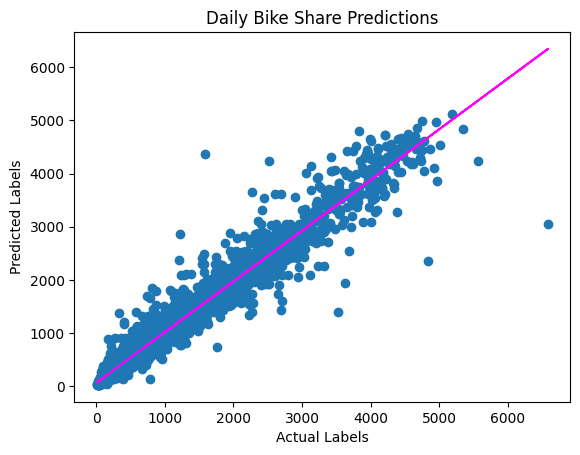

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model_rf = RandomForestRegressor().fit(X_train, y_train)
print (model_rf, "\n")

# Evaluate the model using the test data
predictions = model_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

random forest is more accurate than a decision tree having R2 score 0.954 and MSE, RMSE are also quite lower than the decision tree algorithm.

# Conclusion

we have thoroughly examined the London bike-sharing dataset and performed extensive exploratory data analysis. We used various regression algorithms, including linear, tree-based, and ensemble models, to predict bike rental counts based on various features. After evaluating the results, we discovered that the Random Forest model outperformed the others with a higher R2 score and lower MSE and RMSE.

These findings suggest that Random Forest is a suitable algorithm for predicting bike rentals, and this study provides valuable insights into the factors that influence bike rental counts. These insights could potentially aid in making informed decisions regarding bike-sharing schemes in urban areas. Overall, this study highlights the power of machine learning algorithms in analyzing and predicting complex phenomena and their potential to inform real-world decision-making.

